# `pandas` playbook: basics

Mal Minhas, January 2018, updated Dec 2021

Crash run through core `pandas` concepts in one handy notebook.

## 1. `pandas` objects

Taken from lesson [here](https://www.oreilly.com/learning/introducing-pandas-objects).  `pandas` objects can be thought of as enhanced versions of `numpy` structured arrays in which the rows and columns are identified with labels rather than simple integer indices.  There are three fundamental `pandas` objects: the **Series**, **DataFrame**, and **Index**.

In [1]:
import pandas as pd
import numpy as np
pd.__version__

'2.2.0'

#### 1.1 Series

The essential difference is the presence of the index: while the Numpy Array has an _implicitly_ defined integer index used to access the values, the Pandas Series has an _explicitly_ defined index associated with the values.  For example, the index need not be an integer, but can consist of values of any desired type. For example, if we wish, we can use strings as an index:

In [2]:
series = pd.Series([0.25, 0.5, 0.75, 1.0])
series

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [3]:
series = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
series

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [4]:
series.tolist()

[0.25, 0.5, 0.75, 1.0]

In this way, you can think of a Pandas Series a bit like a specialization of a Python dictionary. 
The series-as-dict analogy can be made even more clear by constructing a Series object directly from a Python dictionary:

In [5]:
population_dict = {'California': 38332521,'Texas': 26448193,'New York': 19651127,
                   'Florida': 19552860,'Illinois': 12882135}
population_series = pd.Series(population_dict)
population_series

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [6]:
population_series.tolist()

[38332521, 26448193, 19651127, 19552860, 12882135]

#### 1.2 DataFrame

A DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names. Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a DataFrame as a sequence of aligned Series objects. Here, by “aligned” we mean that they share the same index.  Let's demonstrate this by creating an `area` Series to go with the `population` series above:

In [7]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995}
area_series = pd.Series(area_dict)
area_series

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [8]:
df = pd.DataFrame({'population': population_series,'area': area_series})
print(f"type of population_series='{type(population_series)}', type of area_series='{type(area_series)}', type of df='{type(df)}'")
df

type of population_series='<class 'pandas.core.series.Series'>', type of area_series='<class 'pandas.core.series.Series'>', type of df='<class 'pandas.core.frame.DataFrame'>'


,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [9]:
df.area.tolist()

[423967, 695662, 141297, 170312, 149995]

#### 1.3 Index

The Index object is an interesting structure in itself, and it can be thought of either as an immutable array or as an ordered set.

In [10]:
index1 = pd.Index(['area','population',3,4,5])
index2 = pd.Index(['area',8,6,7])
intersect = index1.intersection(index2)
intersect

Index(['area'], dtype='object')

In [11]:
df[intersect]

,area
California,423967
Texas,695662
New York,141297
Florida,170312
Illinois,149995


## 2. Indexing and selection

See [here](https://www.oreilly.com/learning/data-indexing-and-selection) for more details.

#### 2.1 Series as a dictionary

In [12]:
series = pd.Series([0.25, 0.5, 0.75, 1.0],index=['a', 'b', 'c', 'd'])
print(series['b'])
print(series.b)
print(series.keys())
series

0.5
0.5
Index(['a', 'b', 'c', 'd'], dtype='object')


a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

#### 2.2 Series as 1D array

A Series builds on this dictionary-like interface and provides array-style item selection via slices, masking, and fancy indexing, 
Notice that when slicing with an explicit index (i.e. `data['a':'c']`), the final index is included in the slice, while when slicing with an implicit index (i.e. `data[0:2]`), the final index is excluded from the slice.

In [13]:
# slicing by explicit index
series['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [14]:
# slicing by implicit integer index
series[0:2]

a    0.25
b    0.50
dtype: float64

In [15]:
# masking
series[(series > 0.3) & (series < 0.8)]

b    0.50
c    0.75
dtype: float64

In [16]:
# fancy indexing
series[['a', 'd']]

a    0.25
d    1.00
dtype: float64

#### 2.3 Indexers: `.loc[]`,`.iloc[]`,`.ix[]`

Because of this potential confusion in the case of integer indexes, `pandas` provides some special indexer attributes which explicitly access certain indexing schemes. These are not functional methods, but attributes which expose a particular slicing interface to the data in the Series.  First, the `loc` attribute allows indexing and slicing which always references the explicit index:

In [17]:
series = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
series.loc[1]

'a'

In [18]:
series.loc[1:3]

1    a
3    b
dtype: object

The `iloc` attribute allows indexing and slicing which always references the implicit Python-style index:

In [19]:
series.iloc[1]

'b'

In [20]:
series.iloc[1:3]

3    b
5    c
dtype: object

A third indexing attribute, `ix`, is a hybrid of the two, and for Series objects is equivalent to standard []-based indexing.  Note **`ix` is deprecated now**.  The explicit nature of loc and iloc make them very useful in maintaining clean and readable code; especially in the case of integer indexes.

In [21]:
try:
    series.ix[1:3]
except Exception as e:
    print(e)

'Series' object has no attribute 'ix'


Let's create a dataframe `df` using two series:

In [22]:
area_series = pd.Series({'California': 423967, 'Texas': 695662,'New York': 141297, 
                  'Florida': 170312,'Illinois': 149995})
population_series = pd.Series({'California': 38332521, 'Texas': 26448193,'New York': 19651127, 
                 'Florida': 19552860,'Illinois': 12882135})
df = pd.DataFrame({'area':area_series, 'pop':population_series})
df

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


We can use attribute-style access with column names which are strings. For example:

In [23]:
df.area is df['area']

True

Though this is a useful shorthand, keep in mind that it does not work for all cases! For example, if the column names are not strings, or if the column names conflict with methods of the dataframe, this attribute-style access is not possible. For example, the DataFrame has a `pop` method, so `data.pop` will point to this rather than the `pop` column:

In [24]:
df.pop is df['pop']

False

`.loc[]` is used for accessing a group of rows and columns by **label(s)** or a boolean array.  Here's an example by label:

In [25]:
df.loc["Texas","pop"]

26448193

Here's an example by boolean array pulling out the same value which returns a dataframe:

In [26]:
df.loc[[False,True,False,False,False],[False,True]]

,pop
Texas,26448193


**Explicit** access by label is up to and including the final index - this `.loc[]` request gets us the whole dataframe:

In [27]:
df.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


.iloc[] is primarily by **integer index** (from 0 to length-1 of the axis), but may also be used with a boolean array.

In [28]:
df.iloc[1,1]

26448193

**Implicit** access is up to but excluding the final index.

In [29]:
df.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


## 3. `pandas` plotting

Let's retrieve some data, in this case a csv text file contining a noisy sine wave data set, and load it into a dataframe `df`.

In [30]:
import os, urllib

print("1. Retrieving dataset")
target = 'unknown_fxn_data.txt'
if not os.path.exists(target):
    print(f"Downloading '{target}'...")
    url = "http://www.sharpsightlabs.com/wp-content/uploads/2016/04/unknown_fxn_data.txt"
    data = urllib.request.urlopen(url).read()
    with open(target,'wb') as f:
        f.write(data)
    flen = os.stat(target).st_size
    print(f"Downloaded {flen} bytes to file '{target}'")
else:
    print(f"Target '{target}' already exists and will be used")

1. Retrieving dataset
Target 'unknown_fxn_data.txt' already exists and will be used


In [31]:
# 2. open it in pandas
print("2. Create pandas dataframe from dataset")
df = pd.read_csv(target)
df.columns  # returns pd.Index

2. Create pandas dataframe from dataset


Index(['input_var', 'target_var'], dtype='object')

Check `df.head()` and `df.tail()`. `df.describe()` outputs: `mean, std, min, tp25, tp50, tp75`

In [32]:
# 3. describe df
print("3. Describe dataframe")
headers = df.dtypes.index
print("(nrows,ncols) = %s, colnames = %s" % (df.shape,headers.values))
print(f"{df.head(2)} \n...\n{df.tail(2)}")
df.describe()

3. Describe dataframe
(nrows,ncols) = (28, 2), colnames = ['input_var' 'target_var']
   input_var  target_var
0      -2.75   -0.224155
1      -2.55   -0.831694 
...
    input_var  target_var
26       2.45    0.692198
27       2.65    0.480389


,input_var,target_var
count,28.000000,28.000000
mean,-0.050000,-0.031049
std,1.645195,0.819265
min,-2.750000,-1.247315
25%,-1.400000,-0.758314
50%,-0.050000,-0.138764
75%,1.300000,0.695235
max,2.650000,1.177989


You can get `describe()` to output other percetiles such as tp10, tp50, tp90 as follows:

In [33]:
df.describe(percentiles=[.1,.5,.9])

,input_var,target_var
count,28.000000,28.000000
mean,-0.050000,-0.031049
std,1.645195,0.819265
min,-2.750000,-1.247315
10%,-2.210000,-1.061525
50%,-0.050000,-0.138764
90%,2.110000,1.104335
max,2.650000,1.177989


Here's how to get just the `mean` of a column.

In [34]:
df.target_var.mean()

-0.03104925279239459

Let's draw a line plot of `input_var` vs. `target_var` using `df.plot()`.  More on the basics of using `df.plot()` [here](https://www.oreilly.com/learning/simple-line-plots-with-matplotlib).

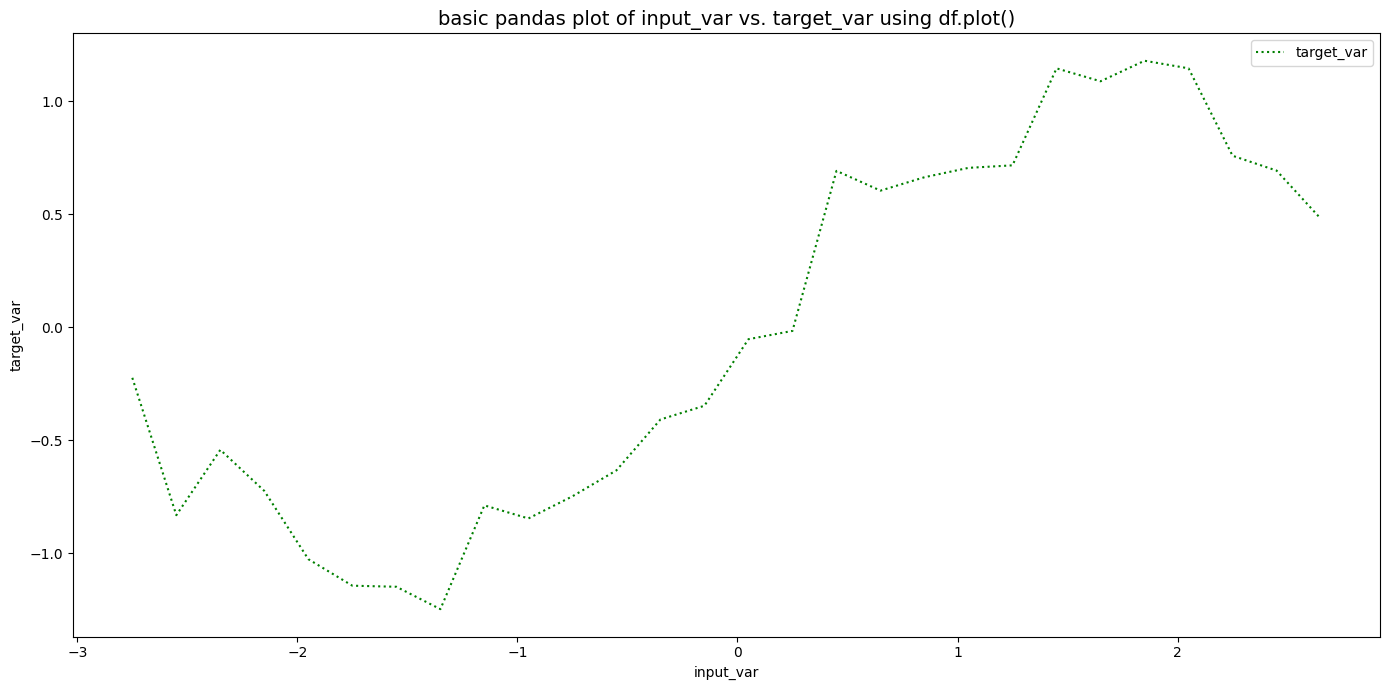

In [35]:
import matplotlib
import matplotlib.pyplot as plt

# 4. pandas plot
title = f"basic pandas plot of input_var vs. target_var using df.plot()"
ax = df.plot(figsize=(14,7), x='input_var',y='target_var',color='g',linestyle='dotted')
ax.set(xlabel='input_var', ylabel='target_var')
ax.set_title(title,fontsize=14)
plt.tight_layout()

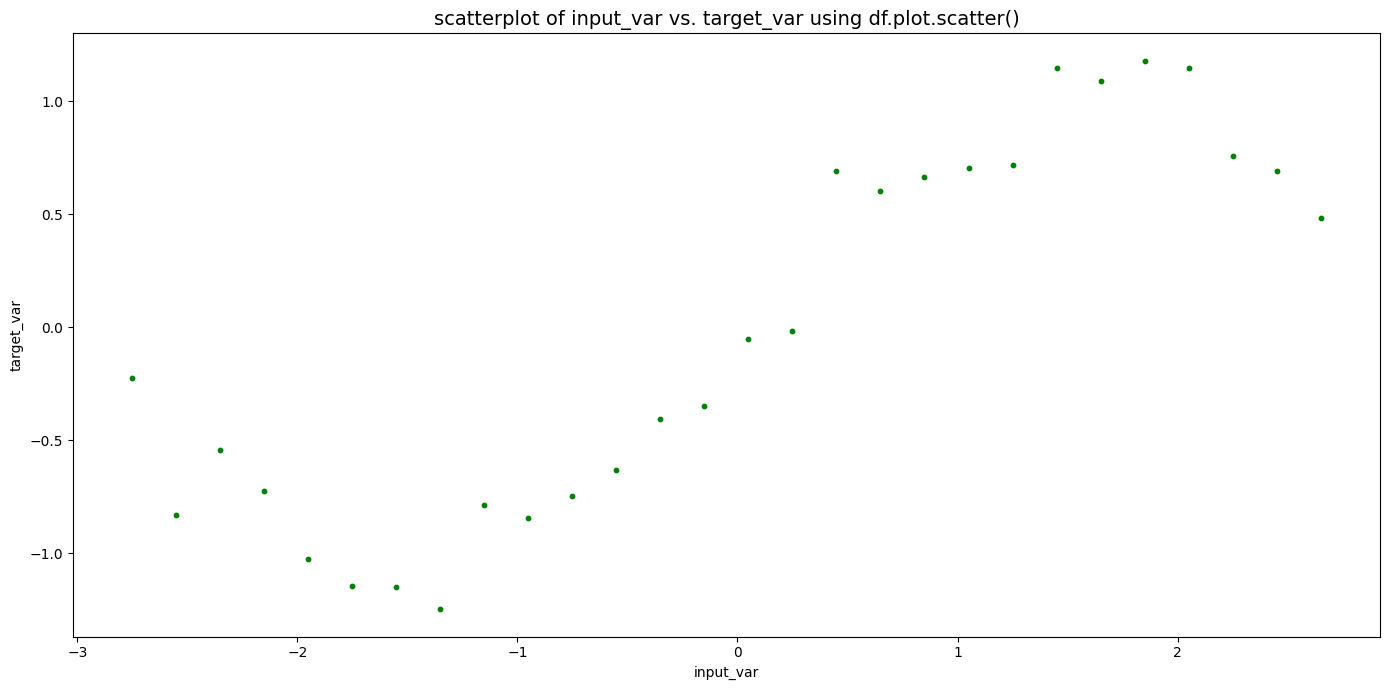

In [36]:
title = f"scatterplot of input_var vs. target_var using df.plot.scatter()"
ax = df.plot.scatter(figsize=(14,7), x='input_var',y='target_var',color='g',s=10)
ax.set(xlabel='input_var', ylabel='target_var')
ax.set_title(title,fontsize=14)
plt.tight_layout()

For completeness, we can also use `matplotlib.pyplot` directly to support graph drawing:

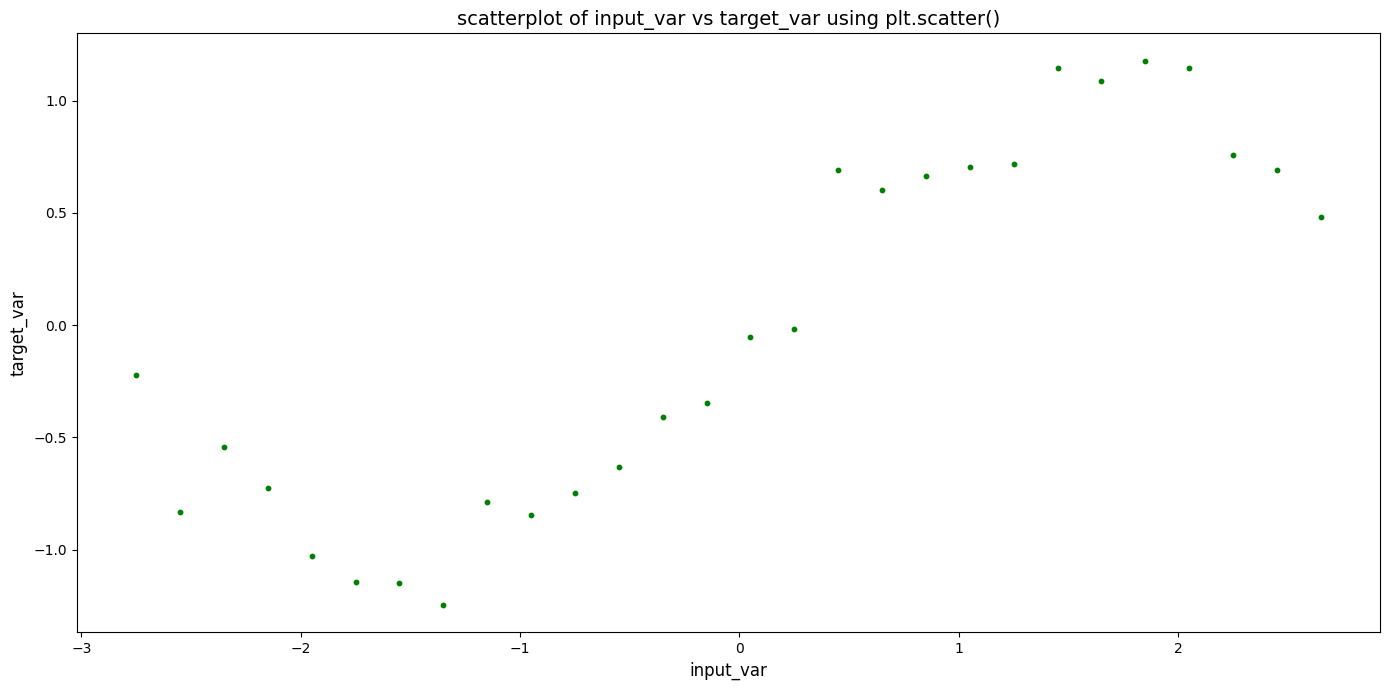

In [37]:
title = f"scatterplot of input_var vs target_var using plt.scatter()"
fig = plt.figure(figsize=(14,7))
ax = plt.subplot(111)
plt.scatter(x=df.input_var,y=df.target_var,c='g',s=10)
ax.set_xlabel('input_var', fontsize=12)
ax.set_ylabel('target_var', fontsize=12)
ax.set_title(title, fontsize=14)
plt.tight_layout()

## 4. `groupby` and `pivot_table`

Let's get the Titanic dataset using the [`seaborn`](https://seaborn.pydata.org/) visualisation module.  `seaborn` provides an API on top of `matplotlib` which uses some nice plot & color defaults as well as simple functions for common statistical plot types. It also integrates with the functionality provided by `pandas` dataframes.  We can set the `seaborn` style as the default `matplotlib` style by calling `sns.set()`.  After doing this, even simple `matplotlib` and `pandas` plots will look much better.  More notes [here](https://www.oreilly.com/learning/data-visualization-with-seaborn).

In [38]:
import seaborn as sns
#sns.set_style('white')

titanic_df = sns.load_dataset('titanic')
print(titanic_df.shape)
titanic_df.head(10)

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


To start learning more about this data, we might want to like to group it by gender, survival, or some combination thereof. You might be tempted to start by applying a `groupby` operation to this data. For example, let’s look at survival rate by gender:

In [39]:
titanic_df.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


We can `groupby` both `sex` and `class` to get more refined means.  Note that the default of `observed=False` is deprecated and will be changed to `True` in a future version of `pandas`. Pass `observed=False` to retain current behavior or o`bserved=True` to adopt the future default and silence this warning.

In [40]:
titanic_df.groupby(['sex', 'class'], observed=False)['survived'].mean()

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

Note what happens when we switch the order of the column names in the `groupby`:

In [41]:
titanic_df.groupby(['class', 'sex'], observed=False)['survived'].mean()

class   sex   
First   female    0.968085
        male      0.368852
Second  female    0.921053
        male      0.157407
Third   female    0.500000
        male      0.135447
Name: survived, dtype: float64

We can `unstack` the dataframe switching back to `sex` and `class` as follows:

In [42]:
titanic_df.groupby(['sex', 'class'], observed=False)['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This is starting to look a bit complicated.  It's easier to use `pandas` `pivot_table` functionaliy instead.  A `pivot_table` takes simple column-wise data as input, and groups the entries into a two-dimensional table which provides a multi-dimensional summarization of the data.    Her's a simple 1D example:

In [43]:
pdf = titanic_df.pivot_table('survived', index='sex')
print(f"type of pdf='{type(pdf)}'")
pdf

type of pdf='<class 'pandas.core.frame.DataFrame'>'


,survived
sex,
female,0.742038
male,0.188908


We can create a 2D `pivot_table` to yield the same result as above in less code than by using a `groupby`:

In [44]:
titanic_df.pivot_table('survived', index='sex',columns='class', observed=False)

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


We can also switch the columns and rows in the `pivot_table`:

In [45]:
titanic_df.pivot_table('survived', index='class', columns='sex', observed=False)

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


We can also put conditional filters into the `pivot_table`:

In [46]:
age = pd.cut(titanic_df['age'], [0, 18, 80])
fare = pd.qcut(titanic_df['fare'], 2)
titanic_df.pivot_table('survived', index=[age,'sex'], columns=[fare,'class'], observed=False)

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
age      sex                                                             
(0, 18]  female              NaN  1.000000  0.714286          0.909091   
         male                NaN  0.000000  0.260870          0.800000   
(18, 80] female              NaN  0.880000  0.444444          0.972973   
         male                0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
age      sex                         
(0, 18]  female  1.000000  0.318182  
         male    0.818182  0.178571  
(18, 80] female  0.914286  0.391304  
         male    0.030303  0.192308